### task 1

# Применение логистической регрессии для решения задачи классификации

# Описание набора данных

Данный набор содержит информацию о пассажирах корабля «Титаник», затонувшего в ночь на 15-е апреля 1912 года. Некоторое количество пассажиров спаслось, чему способствовало множество различных факторов, включая их пол, возраст, на какой палубе находилась их кабина, социальный статус, и т.д.

Набор данных состоит из различных признаков, описывающих информацию о пассажирах. Каждая строка таблицы — отдельный пассажир, вся информация о нем содержится в его строке. 

Описание датасета:
- **Survived** (целевой признак): выжил ли пассажир (0 = Нет, 1 = Да);
- **Pclass**: класс каюты (1 = 1st, 2 = 2nd, 3 = 3rd);
- **Sex**: пол (female или male)	
- **Age**: возраст в годах
- **SibSp**: количество братьев, сестёр (в том числе сводных) и супругов на борту	
- **Parch**: количество детей и родителей на борту
- **Ticket**: номер билета	
- **Fare**: стоимость проезда пассажира	
- **Cabin**: номер каюты	
- **Embarked**: порт посадки пассажира (C = Cherbourg, Q = Queenstown, S = Southampton).

Необходимо решить задачу классификации и научиться предсказывать целовой признак **Survived** — выживет ли пассажир — по соответсвующим ему нецелевым признакам.


# Подготовка и первичный анализ данных

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

Установите количество пропущенных значений поля <code>age</code>:

In [1534]:
df = pd.read_csv('./data/titanic_train.csv')
df['age'].isna().sum()

199

Определите долю выживших

In [1535]:
f"{df['survived'].sum() / df['survived'].count():.3f}"

'0.382'

Определите долю пропущенных значений в рамках каждого признака и избавьтесь от тех признаков, где доля пропусков больше трети. Также удалите колонку <code>ticket</code>, вряд ли эта информация будет полезной.

In [1536]:
columns = df.columns
columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'home.dest'],
      dtype='object')

In [1537]:
peoples = df.shape[0]
columns_to_del = []

for col in columns:
    t = df[col].isna().sum() / peoples

    if t > 0.3:
        columns_to_del.append(col)

columns_to_del.append('ticket')
columns_to_del

['cabin', 'home.dest', 'ticket']

In [1538]:
df = df.drop(columns = columns_to_del)
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

Из описания набора данных видно, что колонки <code>sibsp</code> и <code>parch</code> по сути отвечают за размер семьи. Замените эти две колонки на колонку <code>fam_size</code>, значения которой будут вычисляться как сумма соответствующих значений в колонках <code>sibsp</code> и <code>parch</code>. 

In [1539]:
df['fam_size'] = df['sibsp'] + df['parch']
df = df.drop(columns = ['sibsp', 'parch'])

In [1540]:
f"{df['fam_size'].mean():.3f}"

'0.866'

Полученный датасет будем называть **исходным** (выброшенные на этом этапе признаки не нужно возвращать ни на одном из последующих этапов выполнения задания). Вычислите полученное число предикторов.

In [1541]:
len(df.columns) - 1

7

На основе имеющейся статистики оцените вероятность выжить если пассажир -- представитель определенной категории (указана в вашем индивидуальном задании)

In [1542]:
# # female & pclass:2
f"{df[(df['sex'] == 'female') & (df['pclass'] == 2.0)]['survived'].sum() / df[(df['sex'] == 'female') & (df['pclass'] == 2.0)]['survived'].count():.3f}"

'0.846'

Постройте гистограммы выжиших и невыживших по возрастам.

array([<AxesSubplot: title={'center': '0.0'}>,
       <AxesSubplot: title={'center': '1.0'}>], dtype=object)

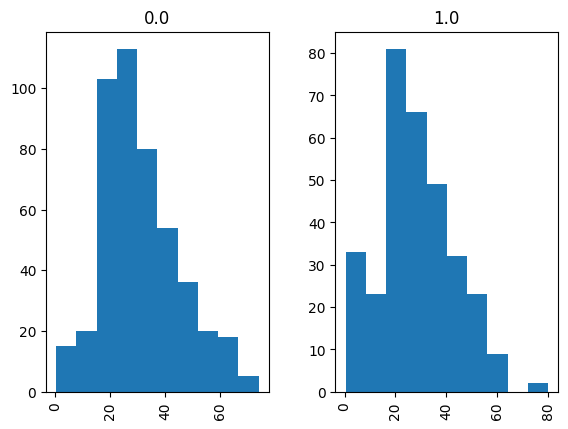

In [1543]:
df.hist(column=['age'], by = df['survived'], grid = True)

# Модель на основе числовых признаков

## Удаление строк с пропусками

В качестве базовой модели имеет смысл построить модель с минимальными трудозатратами.

Из исходного датасета удалите все категориальные признаки, а также строки, содержащие пропуски.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки<b> с параметрами, указанными в вашем задании</b>. Используйте стратификацию по колонке <code>survived</code>.

Обучите модель <code>LogisticRegression()</code> <b>с параметрами, указанными в вашем задании</b>, на тренировочных данных, оцените на тестовых.

Вычислите <code>f1_score</code> модели на тестовых данных (рекомендуем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">соответствующую функцию</a> с параметрами по умолчанию.



In [1544]:
df.dtypes

pclass      float64
survived    float64
name         object
sex          object
age         float64
fare        float64
embarked     object
fam_size    float64
dtype: object

In [1545]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.dtypes

pclass      float64
survived    float64
age         float64
fare        float64
fam_size    float64
dtype: object

In [1546]:
numeric_df = numeric_df.dropna()

In [1547]:
X = numeric_df.drop(columns = ['survived'])
y = numeric_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 91,
                                                    stratify = numeric_df['survived'])


In [1548]:
clf = LogisticRegression(random_state = 91, max_iter = 1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1549]:
f"{f1_score(y_test, y_pred):.3f}"

'0.442'

## Заполнение пропусков средним

Качество полученной модели оставляет желать лучшего. Имеет смысл попробовать заполнить пропуски. Из исходного набора данных удалите категориальные признаки, а пропуски заполните средним по столбцу. Далее аналогично: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [1550]:
numeric_df = df.select_dtypes(include = [np.number])
numeric_df.dtypes

pclass      float64
survived    float64
age         float64
fare        float64
fam_size    float64
dtype: object

In [1551]:
columns = numeric_df.columns

for col in columns:
    numeric_df[col] = numeric_df[col].fillna(numeric_df[col].mean())

In [1552]:
X = numeric_df.drop(columns = ['survived'])
y = numeric_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 91,
                                                    stratify = numeric_df['survived'])


In [1553]:
clf = LogisticRegression(random_state = 91, max_iter = 1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1554]:
f"{f1_score(y_test, y_pred):.3f}"

'0.484'

## Заполнение пропусков на основе обращения


Очевидно, что заполнение пропусков в колонке <code>age</code> средним — не самая разумная идея. Возможно, стоит выполнить эту процедуру как-то более интеллектуально, например, с оглядкой на обращение к человеку. 

Можно заметить, что исходный датасет в столбце <code>name</code> содержит информацию о социальном статусе пассажира, а именно присутсвуют обращения <code>Mr., Mrs., Dr.</code> и т.д. На основе этой информации можно попробовать сделать предположение о возрасте пассажира.

Верните в рассмотрение колонку <code>name</code>. Создайте отдельную колонку <code>honorific</code> и поместите туда значения обращений.

Вычислите число уникальных обращений.

In [1555]:
new_df = df.select_dtypes(include = [np.number])
new_df['name'] = df['name']
new_df.dtypes

pclass      float64
survived    float64
age         float64
fare        float64
fam_size    float64
name         object
dtype: object

In [1556]:
def get_honorific(name):
    honorific = name.split(",")[1].split(" ")
   
    if honorific[1] == 'the':
        return honorific[2]
    
    return honorific[1]

new_df['honorific'] = new_df['name'].apply(lambda x: get_honorific(x))
new_df['honorific'].unique()

array(['Miss.', 'Mrs.', 'Mr.', 'Master.', 'Mlle.', 'Rev.', 'Ms.', 'Col.',
       'Dona.', 'Dr.', 'Countess.', 'Major.', 'Don.', 'Capt.'],
      dtype=object)

In [1557]:
len(new_df['honorific'].unique())

14

Скорее всего имеет смысл сократить число обращений, добавив малочисленные группы к более многочисленным, так как принципиальной разницы между, например, <code>Don</code> и <code>Mr</code>, видимо, нет. Отметим, что <code>Master</code> — это прежнее обращение к ребенку, с этим обращением будем работать отдельно.




Выполните следующие замены:

<code>Mr</code> $\leftarrow$ <code>['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt']</code>

<code>Mrs</code> $\leftarrow$ <code> ['Dona', 'Countess']</code>

<code>Miss</code> $\leftarrow$ <code> ['Mlle', 'Ms']</code>

In [1558]:
def change_name(name):
    if name in ['Rev.', 'Col.', 'Dr.', 'Major.', 'Don.', 'Capt.']:
        return 'Mr.'
    elif name in ['Dona.', 'Countess.']:
        return 'Mrs.'
    elif name in ['Mlle.', 'Ms.']:
        return 'Miss.'
    
    return name

new_df['honorific'] = new_df['honorific'].apply(lambda x: change_name(x))
new_df['honorific'].unique()

array(['Miss.', 'Mrs.', 'Mr.', 'Master.'], dtype=object)

Вычислите долю строк со значением <code>Master</code> относительно числа всех мужчин

In [1559]:
f"{new_df[new_df['honorific'] == 'Master.']['honorific'].count() / new_df[(new_df['honorific'] == 'Master.') | (new_df['honorific'] == 'Mr.')]['honorific'].count():.3f}"

'0.072'

Вычислите средний возраст категории, указанной в вашем индивидуальном задании

In [1560]:
f"{new_df[new_df['honorific'] == 'Master.']['age'].mean():.3f}"

'5.128'

Заполните пропуски в колонке <code>age</code> средним, соответствующим среднему категории <code>honorific</code>.

Избавьтесь от нечисловых признаков. Далее аналогично: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [1561]:
new_df.isna().sum()

pclass         0
survived       0
age          199
fare           0
fam_size       0
name           0
honorific      0
dtype: int64

In [1562]:
avg = {}
vals = new_df['honorific'].unique()

for val in vals:
    avg[val] = new_df[new_df['honorific'] == val]['age'].mean()

def set_age(row):
    if pd.isna(row['age']):
        return avg[row['honorific']] 
    return row['age']

new_df['age'] = new_df[['age', 'honorific']].apply(set_age, axis=1)

In [1563]:
new_df.isna().sum()

pclass       0
survived     0
age          0
fare         0
fam_size     0
name         0
honorific    0
dtype: int64

In [1564]:
new_df = new_df.select_dtypes(include = [np.number])
new_df.dtypes

pclass      float64
survived    float64
age         float64
fare        float64
fam_size    float64
dtype: object

In [1565]:
X = new_df.drop(columns = ['survived'])
y = new_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 91,
                                                    stratify = new_df['survived'])


In [1566]:
clf = LogisticRegression(random_state = 91, max_iter = 1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1567]:
f"{f1_score(y_test, y_pred):.3f}"

'0.484'

# Модель с использование категориальных признаков

В исходном наборе данных заполните пропуски колонки <code>age</code> значениями на основе обращений (как в предыдущем пункте).

Не используйте признаки <code>name</code> и <code>honorific</code>. Они свою функцию выполнили.

Произведите <code>one-hot</code> кодировние нечисловых признаков, например, с помощью <code>pd.get_dummies(drop_first=True)</code>. Далее по знакомой схеме: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [1568]:
cols = df.columns
cols

Index(['pclass', 'survived', 'name', 'sex', 'age', 'fare', 'embarked',
       'fam_size'],
      dtype='object')

In [1569]:
for col in cols:
    if col not in new_df.columns and col != 'name':
        new_df[col] = df[col]

In [1570]:
new_df.columns

Index(['pclass', 'survived', 'age', 'fare', 'fam_size', 'sex', 'embarked'], dtype='object')

In [1571]:
new_df.dtypes

pclass      float64
survived    float64
age         float64
fare        float64
fam_size    float64
sex          object
embarked     object
dtype: object

In [1572]:
categorical_columns = new_df.select_dtypes(include=['object']).columns.tolist()

dummies = pd.get_dummies(new_df[categorical_columns], drop_first=True)
new_df = new_df.drop(categorical_columns, axis=1)
new_df = pd.concat([new_df, dummies], axis=1)

In [1573]:
new_df.columns

Index(['pclass', 'survived', 'age', 'fare', 'fam_size', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [1574]:
X = new_df.drop(columns = ['survived'])
y = new_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 91,
                                                    stratify = new_df['survived'])


In [1575]:
clf = LogisticRegression(random_state = 91, max_iter = 1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1576]:
f"{f1_score(y_test, y_pred):.3f}"

'0.657'

### task 2

In [1577]:
df_train = pd.read_csv("./data/titanic_train.csv")
df_test = pd.read_csv("./data/titanic_reserved.csv")

In [1578]:
df_train.shape, df_test.shape

((981, 12), (328, 11))

In [1579]:
df_train = df_train.drop(columns = ['cabin', 'home.dest', 'ticket'])
df_test = df_test.drop(columns = ['cabin', 'home.dest', 'ticket'])

In [1580]:
# df_train['fam_size'] = df_train['sibsp'] + df_train['parch']
# df_train = df_train.drop(columns = ['sibsp', 'parch'])

In [1581]:
# df_test['fam_size'] = df_test['sibsp'] + df_test['parch']
# df_test = df_test.drop(columns = ['sibsp', 'parch'])

In [1582]:
def get_honorific(name):
    honorific = name.split(",")[1].split(" ")
   
    if honorific[1] == 'the':
        return honorific[2]
    
    return honorific[1]

df_train['honorific'] = df_train['name'].apply(lambda x: get_honorific(x))
df_test['honorific'] = df_test['name'].apply(lambda x: get_honorific(x))

In [1583]:
def change_name(name):
    if name in ['Rev.', 'Col.', 'Dr.', 'Major.', 'Don.', 'Capt.']:
        return 'Mr.'
    elif name in ['Dona.', 'Countess.']:
        return 'Mrs.'
    elif name in ['Mlle.', 'Ms.']:
        return 'Miss.'
    
    return name

df_train['honorific'] = df_train['honorific'].apply(lambda x: change_name(x))
df_test['honorific'] = df_test['honorific'].apply(lambda x: change_name(x))

In [1584]:
df_train.isna().sum()

pclass         0
survived       0
name           0
sex            0
age          199
sibsp          0
parch          0
fare           0
embarked       0
honorific      0
dtype: int64

In [1585]:
df_test.isna().sum()

pclass        0
name          0
sex           0
age          64
sibsp         0
parch         0
fare          0
embarked      2
honorific     0
dtype: int64

In [1586]:
avg = {}
vals = df_train['honorific'].unique()

for val in vals:
    avg[val] = df_train[df_train['honorific'] == val]['age'].mean()

def set_age(row):
    if pd.isna(row['age']):
        return avg[row['honorific']] 
    return row['age']

df_train['age'] = df_train[['age', 'honorific']].apply(set_age, axis=1)

In [1587]:
df_train = df_train.drop(columns = ['honorific', 'name'])

In [1588]:
avg = {}
vals = df_test['honorific'].unique()

for val in vals:
    avg[val] = df_test[df_test['honorific'] == val]['age'].mean()

def set_age(row):
    if pd.isna(row['age']):
        return avg[row['honorific']] 
    return row['age']

df_test['age'] = df_test[['age', 'honorific']].apply(set_age, axis=1)

In [1589]:
df_test = df_test.drop(columns = ['honorific', 'name'])

In [1590]:
df_test.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [1591]:
most_frequent_embarked = df_test['embarked'].mode()[0]

df_test['embarked'] = df_test['embarked'].replace('', most_frequent_embarked)

In [1592]:
df_test.shape

(328, 7)

In [1593]:
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()

dummies = pd.get_dummies(df_train[categorical_columns], drop_first=True)
df_train = df_train.drop(categorical_columns, axis=1)
df_train = pd.concat([df_train, dummies], axis=1)

dummies = pd.get_dummies(df_test[categorical_columns], drop_first=True)
df_test = df_test.drop(categorical_columns, axis=1)
df_test = pd.concat([df_test, dummies], axis=1)

In [1594]:
df_train.columns, df_test.columns

(Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
        'embarked_Q', 'embarked_S'],
       dtype='object'),
 Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q',
        'embarked_S'],
       dtype='object'))

In [1595]:
X_train = df_train.drop(columns = ['survived'])
y_train = df_train['survived']

X_test = df_test


In [1596]:
clf = LogisticRegression(random_state = 91, max_iter = 1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1597]:
print(*y_pred.astype(int), sep = ", ")

0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0
